# SpaceX Dashboard 

In [ ]:
## Importing Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from dash import Input,Output,callback,dcc,html, Dash

In [140]:
spaceX_df=pd.read_csv("spacex_launch_dash.csv")

In [141]:
spaceX_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                56 non-null     int64  
 1   Flight Number             56 non-null     int64  
 2   Launch Site               56 non-null     object 
 3   class                     56 non-null     int64  
 4   Payload Mass (kg)         56 non-null     float64
 5   Booster Version           56 non-null     object 
 6   Booster Version Category  56 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.2+ KB


In [139]:
#dropping unwanted columns
spaceX_df.drop(['Unnamed: 0','Flight Number'],axis=1,inplace=True)

In [142]:
# setting the options variable for th dashboard
Launch_site=spaceX_df['Launch Site'].unique()
options_ls=[]
options_ls=[{'label':a,'value':a} for a in Launch_site]
options_ls.append({'label':'All sites','value':'All'})
mapping_={0:'Failed',1:'Successful'}
Outcome_=spaceX_df["class"].unique()
options_outcome=[{'label':mapping_[a],'value':a} for a in Outcome_]
# options_outcome.append({'label':'All','value':'All Outcome'})
options_outcome

[{'label': 'Failed', 'value': 0}, {'label': 'Successful', 'value': 1}]

In [143]:
external_stylesheets_ = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# create a dashboard instance
app=Dash(__name__,external_stylesheets=external_stylesheets_)


app.layout=html.Div(
    # Dashboard Title
    children=[html.H1('SpaceX Launch Records Dashboard',style={'textAlign':'center','color':'#000500','font-size':'40px'}),
    # Dropdown for Launch Site
 html.Div([html.Div(dcc.Dropdown(id='all_site_dropdown',options=options_ls,value='All',placeholder='Launch Site',searchable=True,style={'border-radius':'10px'}),style={"width":"25%"}),html.Br(),
    # Dropdown for Outcome of Launch
           
           html.Div(dcc.Dropdown(id='outcome', options=options_outcome,value=1,placeholder='Outcome', searchable=True,style={'border-radius':'10px'}),style={"width":"25%"}),],style={'display':'grid',}),
    #create graph components
html.Div([html.Div(dcc.Graph(id='pie_chart'),style={'border-color':'black'}),html.Div(dcc.Graph(id='success_payload_scatter_chart'),style={'border-color':'black'})],style={'display':"flex",'border': '5px red',
    'border-color': '#b91414','justify-content': 'space-between'}),
html.Div([html.P('Payload Mass (kg):',style={'color':'white'}),dcc.RangeSlider(id='payload_slider',
                min=0, max=10000, step=10,
                marks={0: {'label':'0','style':{'color':'blue'}},10000: {'label':'10000','style':{'color':'green'}}},
                value=[spaceX_df['Payload Mass (kg)'].min(),spaceX_df['Payload Mass (kg)'].max() ],tooltip={'placement':'bottom',"always_visible":True}),
html.Br()]),
])                             


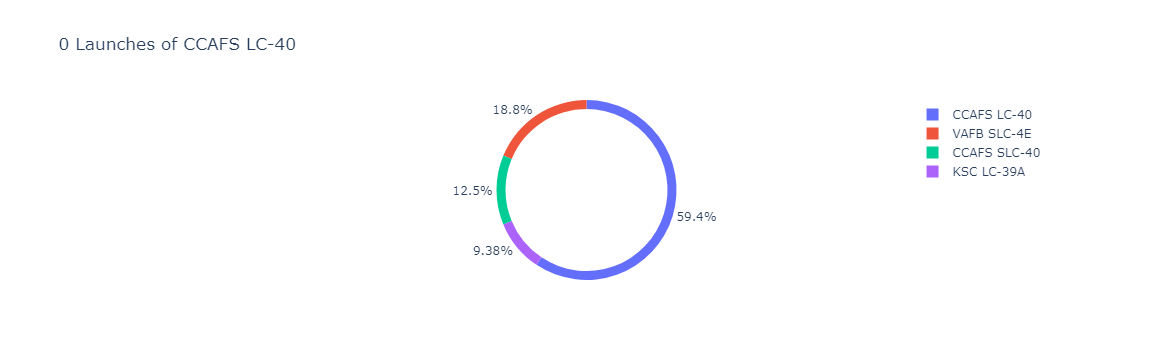

In [103]:
entered_site='CCAFS LC-40'
outcome_=0
spaceX_df.columns

__=spaceX_df[spaceX_df['class']==outcome_].groupby(['Launch Site','class']).size().reset_index(name='counts')

__
pie_= px.pie(__,names='Launch Site', values='counts',hole=.9, title=f'{outcome_} Launches of {entered_site}')
pie_

In [144]:
# Function decorator to specify function input and output
@app.callback(Output(component_id='pie_chart', component_property='figure'),
              [Input(component_id='all_site_dropdown', component_property='value'),
               Input(component_id='outcome',component_property='value')])
# 
def get_pie_chart(entered_site,outcome_):
    mapping={1:'Successful',0:'Failed'}
    filtered_df = spaceX_df
    if entered_site == 'All':
        if outcome_ == 1:
            # print('All Successful')
            fig=px.pie(spaceX_df,names='Launch Site', values='class',hole=.9,height=300,width=500,title=f'The Ratio of {entered_site} Launches which are Successful')
            return fig
        else:
            # print('All Failed')
            __=spaceX_df[spaceX_df['class']==outcome_].groupby(['Launch Site','class']).size().reset_index(name='counts')         
            fig=px.pie(__,names='Launch Site', values='counts',hole=.9,height=300,width=500,title=f'The Ratio of {entered_site} Launches which Failed')
            return fig
    else:
        # if outcome_=='Successful':
        ___=spaceX_df[spaceX_df['Launch Site']==entered_site].groupby(['Launch Site','class']).size().reset_index(name='counts')   
            # print(___)
        das=px.pie(___,names='class',values='counts',hole=.9,height=300,width=500,title=f'The Ratio of {entered_site} Successful and Failed Launches ')
        das.update_layout()
        return das

@app.callback(Output(component_id='success_payload_scatter_chart',component_property='figure'),
  [Input(component_id='payload_slider', component_property='value'),Input(component_id='all_site_dropdown',component_property='value'), Input(component_id='outcome',component_property='value')])
def payloader_slide(mass,entered_site,outcome_):
    mapping={1:'Successful',0:'Failed'}
    if entered_site=='All':
        if outcome_==1:
            payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1]) & (spaceX_df['class']==outcome_)]
            # print("1")  
            fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site',color='Booster Version Category',height=300,width=700,size='Payload Mass (kg)',title=f'ScatterPlot of All {mapping.get(outcome_)} PayLoad Mass')
            return fig
        else:
            payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1]) &(spaceX_df['class']==outcome_)]
            # print('2')
            fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site',color='Booster Version Category',height=300,width=700,size='Payload Mass (kg)', title=f'ScatterPlot of All {mapping.get(outcome_)} PayLoad Mass')
            return fig
            # print(f)
    else:
        payL=spaceX_df[(spaceX_df['Payload Mass (kg)'] >= mass[0]) & (spaceX_df['Payload Mass (kg)']<= mass[1])& (spaceX_df['Launch Site']==entered_site) & (spaceX_df['class']==1)]
        # print('3')
        fig=px.scatter(payL,x='Payload Mass (kg)',y='Launch Site', color='Booster Version Category',height=300,width=700,size='Payload Mass (kg)', title=f'ScatterPlot  of successful {entered_site} PayLoad Mass (kg)')
        return fig
    
if __name__=='__main__':
    # app.run_server()
    app.run_server(port=8081,host= '127.0.0.2',debug=True)

In [127]:
%%html
From the Dashboard above, it can be deducted that:
<ol>
<li><b>KSC LC-39A</b> has the highest amount of <i>succesful lauches<i> amasing up to <b>42%</b> of the succesful launches </li>
<li><b>CCAFS SLC-40</b> has the lowest amount of </>successful launches</i> with just <b>13%</b> </li>
<li>The <i>highest launch success rate</i> happend with <b>VAFB SLC-4E</b> having <b>9600 kg</b> Payload Mass </li>
<li>The <i>lowest launch success rate</i> happend with <b>CCAFS SLC-40</b> having <b>362 kg</b> Payload Mass </li>
<li><b>The F9 Booster Version</b> with the highest success rate is <b>FT</b></li>
</ol>
<style>
 b{
     font-weight:1500;
},
li{
    background-color:lightblue;
    font-family:verdana;
}
</style>